In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
import os

root_dir="/content/drive/MyDrive/RCA/variations"

tot_var_files=[]
for i in os.listdir(root_dir):
  if(i.endswith(".csv")):
    # print(i)
    tot_var_files.append(root_dir+"/"+i)

print(len(tot_var_files))

180


In [4]:
o=pd.read_csv("/content/drive/MyDrive/RCA/devices/1033201220.csv")
o.head(2)

,time,Battery,Humidity,Internal Temperature,Soil Temperature,Temperature,Signal Strength
0,2022-01-01T00:50:00.000Z,287,75,53,19.0,27,NaN
1,2022-01-01T01:10:00.000Z,287,76,53,19.0,27,NaN


In [5]:
print(tot_var_files[4])
f=pd.read_csv(tot_var_files[4])

/content/drive/MyDrive/RCA/variations/1033201220.csv


In [ ]:
f.head(3)

,index,time,Battery,Humidity,Internal Temperature,Soil Temperature,Temperature,Signal Strength,Bmin,Bmax,...,Hsensor,HFaults,ITsensor,ITFaults,STsensor,STFaults,Tsensor,TFaults,SSsensor,SSFaults
0,9,2022-01-01T06:39:00.000Z,303.0,88.0,50.0,28.0,24.0,NaN,NaN,NaN,...,Humidity,HVAR,NaN,NaN,Soil Temperature,STVAR,NaN,NaN,NaN,NaN
1,10,2022-01-01T07:59:00.000Z,318.0,45.0,62.0,30.0,39.0,NaN,NaN,318.0,...,Humidity,HVAR,NaN,NaN,Soil Temperature,STVAR,Temperature,TVAR,NaN,NaN
2,33,2022-02-09T13:41:13.410Z,313.0,56.0,52.0,NaN,28.0,31.0,NaN,NaN,...,Humidity,HVAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ndf=f[f['HFaults']=='HVAR']
ndf.head(3)

,index,time,Battery,Humidity,Internal Temperature,Soil Temperature,Temperature,Signal Strength,Bmin,Bmax,...,Hsensor,HFaults,ITsensor,ITFaults,STsensor,STFaults,Tsensor,TFaults,SSsensor,SSFaults
0,9,2022-01-01T06:39:00.000Z,303.0,88.0,50.0,28.0,24.0,NaN,NaN,NaN,...,Humidity,HVAR,NaN,NaN,Soil Temperature,STVAR,NaN,NaN,NaN,NaN
1,10,2022-01-01T07:59:00.000Z,318.0,45.0,62.0,30.0,39.0,NaN,NaN,318.0,...,Humidity,HVAR,NaN,NaN,Soil Temperature,STVAR,Temperature,TVAR,NaN,NaN
2,33,2022-02-09T13:41:13.410Z,313.0,56.0,52.0,NaN,28.0,31.0,NaN,NaN,...,Humidity,HVAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ndf.shape

(810, 30)

In [ ]:
def plot_data(hdf,x,y,color):
    hdf.reset_index(inplace=True)
    matplotlib.rcParams['figure.figsize'] = (20,10)
      
    plt.plot(hdf[x],hdf[y],color=color)
    plt.legend()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(y + " vs " +x)


    plt.xticks(np.arange(0, len(hdf["time"]) + 1, 50))
    # rotate the labels
    plt.xticks(rotation = 45) 

In [ ]:
o['Humidity'].median()*1.2

85.2

In [ ]:
o['Humidity'].median()*0.8

56.800000000000004

In [ ]:
def plot_filter_data(hdf,sensor):
    col_names={'Battery':'B','Internal Temperature':'IT','Light Intensity':'LIA1','Humidity':'H','Irometer':'IRO','Temperature':'T','Soil Temperature':'ST','Signal Strength':'SS'}
    matplotlib.rcParams['figure.figsize'] = (20,10)
  
        
    plt.plot(hdf['time'],hdf[sensor])
    plt.legend()
    plt.xlabel('time')
    plt.ylabel(sensor)
    plt.title(sensor + " vs " +'time')


    plt.xticks(np.arange(0, len(hdf["time"]) + 1, 50))
    # rotate the labels
    plt.xticks(rotation = 45) 

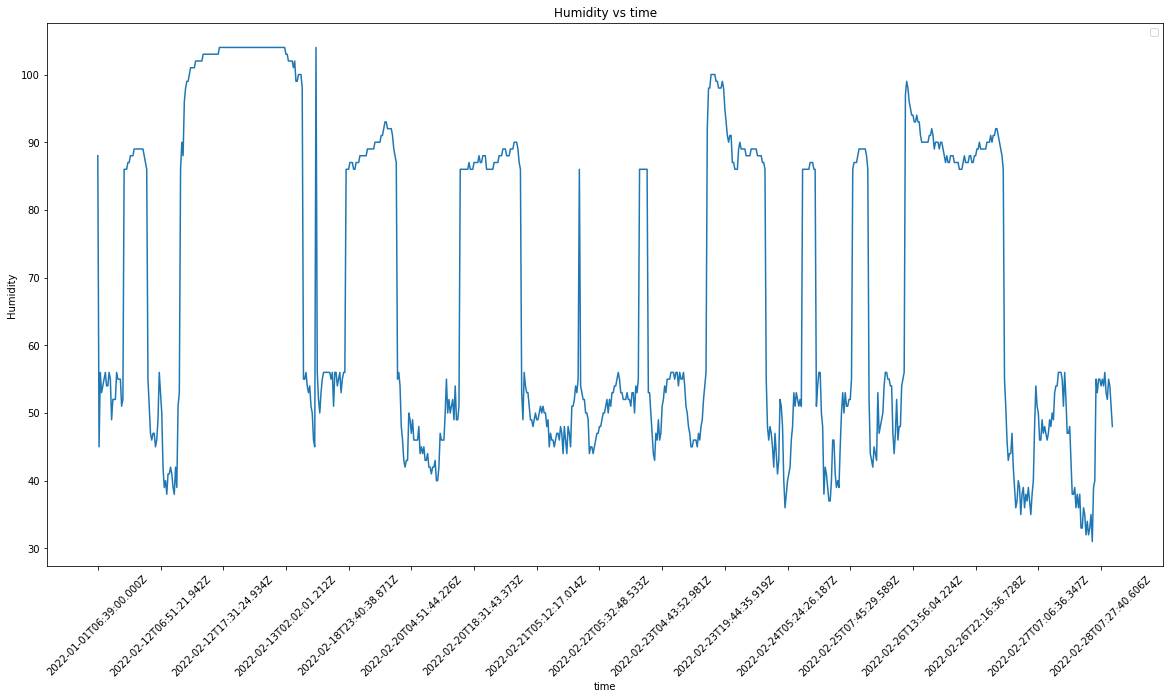

In [ ]:
plot_filter_data(ndf,'Humidity')

In [ ]:
ndf.head(3)

,index,time,Battery,Humidity,Internal Temperature,Soil Temperature,Temperature,Signal Strength,Bmin,Bmax,...,Hsensor,HFaults,ITsensor,ITFaults,STsensor,STFaults,Tsensor,TFaults,SSsensor,SSFaults
0,9,2022-01-01T06:39:00.000Z,303.0,88.0,50.0,28.0,24.0,NaN,NaN,NaN,...,Humidity,HVAR,NaN,NaN,Soil Temperature,STVAR,NaN,NaN,NaN,NaN
1,10,2022-01-01T07:59:00.000Z,318.0,45.0,62.0,30.0,39.0,NaN,NaN,318.0,...,Humidity,HVAR,NaN,NaN,Soil Temperature,STVAR,Temperature,TVAR,NaN,NaN
2,33,2022-02-09T13:41:13.410Z,313.0,56.0,52.0,NaN,28.0,31.0,NaN,NaN,...,Humidity,HVAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
o['time']=pd.to_datetime(o['time'])

In [7]:
ndf['time']=pd.to_datetime(ndf['time'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
o.head()

,time,Battery,Humidity,Internal Temperature,Soil Temperature,Temperature,Signal Strength
0,2022-01-01 00:50:00+00:00,287,75,53,19.0,27,NaN
1,2022-01-01 01:10:00+00:00,287,76,53,19.0,27,NaN
2,2022-01-01 01:29:00+00:00,287,76,53,19.0,27,NaN
3,2022-01-01 01:49:00+00:00,287,75,53,19.0,27,NaN
4,2022-01-01 02:39:00+00:00,287,78,52,19.0,27,NaN


In [ ]:
o.shape

(2775, 7)

In [ ]:
o.isnull().sum()

time                       0
Battery                    0
Humidity                   0
Internal Temperature       0
Soil Temperature        2571
Temperature                0
Signal Strength          204
dtype: int64

In [8]:
def check_wrong_data_points(x,df_,vals,sensor):
  if((x<vals[0])|(x>vals[1])):
    return None
  else:
    return x
      
cols={'Battery':{'min':260,'max':314},'Internal Temperature':{'min':-55,'max':125},'Light Intensity':{'min':0,'max':65535},'Humidity':{'min':0,'max':110},'Irometer':{'min':0,'max':200},'Temperature':{'min':-40,'max':125},'Soil Temperature':{'min':-55,'max':125},'Signal Strength':{'min':2,'max':30}}
vals=[]
#dropping wrong data points
for i in o.columns:
  if(i=='Humidity'):
    for sen,val in cols[i].items():
      vals.append(val)
  else:
    pass
print(vals)
ndf['Humidity']=ndf['Humidity'].apply(lambda x: check_wrong_data_points(x,ndf,vals,'Humidity'))
ndf = ndf.dropna(how='all',axis=0)

[0, 110]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
o.shape

(2775, 7)

In [ ]:
ndf=ndf.set_index('time')

In [ ]:
#validate data points for anomalies
s=validate_series(ndf['Humidity'])

In [ ]:
#plot time series to visually identify any anomalities
# chart = plot(s, ts_linewidth=1, ts_markersize=4)

In [ ]:
!pip install adtk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 2.7 MB/s 


In [ ]:
#using Anomaly Detection Toolkit(ADTK) for anomaly detection
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import ThresholdAD
from adtk.detector import QuantileAD
from adtk.detector import InterQuartileRangeAD
from adtk.detector import PersistAD
from adtk.detector import LevelShiftAD
from adtk.detector import VolatilityShiftAD
from adtk.detector import SeasonalAD
from adtk.detector import AutoregressionAD
from adtk.detector import MinClusterDetector
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans

###High&Low Variations

In [9]:
ndf['Humidity'].value_counts()

104.0    54
86.0     53
89.0     49
87.0     45
88.0     44
56.0     40
55.0     36
46.0     32
53.0     30
54.0     29
90.0     28
52.0     28
51.0     28
47.0     28
50.0     26
48.0     24
49.0     22
45.0     17
103.0    15
42.0     14
44.0     14
91.0     14
39.0     12
43.0     12
38.0     11
102.0    11
40.0     10
92.0      9
98.0      9
100.0     8
99.0      8
41.0      8
93.0      7
36.0      6
101.0     5
37.0      5
35.0      4
94.0      3
33.0      3
96.0      2
95.0      2
32.0      2
97.0      1
34.0      1
31.0      1
Name: Humidity, dtype: int64

In [10]:
new=ndf[['time','Humidity']].copy()

In [11]:
new.head(3)

,time,Humidity
0,2022-01-01 06:39:00+00:00,88.0
1,2022-01-01 07:59:00+00:00,45.0
2,2022-02-09 13:41:13.410000+00:00,56.0


In [12]:
new.shape

(810, 2)

In [13]:
window_size=5
tot_length=new.shape[0]

window_indices= [i for i in range(tot_length) if i % window_size ==0]  
print(window_indices)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805]


In [ ]:
len(window_indices)

162

In [ ]:
new.loc[0]

time        2022-01-01 06:39:00+00:00
Humidity                         88.0
Name: 0, dtype: object

In [14]:
df=pd.DataFrame()
# df=df.append(new.loc[0])

for i in window_indices:
  df=df.append(new.loc[i])
df

,time,Humidity
0,2022-01-01 06:39:00+00:00,88.0
5,2022-02-09 14:14:13.297000+00:00,55.0
10,2022-02-10 08:01:10.212000+00:00,55.0
15,2022-02-10 09:07:09.858000+00:00,56.0
20,2022-02-11 06:48:36.295000+00:00,52.0
...,...,...
785,2022-02-28 04:37:40.768000+00:00,33.0
790,2022-02-28 05:27:40.766000+00:00,32.0
795,2022-02-28 06:17:40.722000+00:00,40.0
800,2022-02-28 07:27:40.606000+00:00,54.0


In [15]:
df['next']=df['Humidity'].shift(-1)

In [16]:
df

,time,Humidity,next
0,2022-01-01 06:39:00+00:00,88.0,55.0
5,2022-02-09 14:14:13.297000+00:00,55.0,55.0
10,2022-02-10 08:01:10.212000+00:00,55.0,56.0
15,2022-02-10 09:07:09.858000+00:00,56.0,52.0
20,2022-02-11 06:48:36.295000+00:00,52.0,87.0
...,...,...,...
785,2022-02-28 04:37:40.768000+00:00,33.0,32.0
790,2022-02-28 05:27:40.766000+00:00,32.0,40.0
795,2022-02-28 06:17:40.722000+00:00,40.0,54.0
800,2022-02-28 07:27:40.606000+00:00,54.0,52.0


In [17]:
df.fillna(0.0,inplace=True)

In [18]:
df['diff']=df['Humidity']-df['next']
def absolute_val(x):
  if(x<0):
    x=x*(-1)
    return x
  elif(x>0):
    return x
  else:
    return x


In [19]:
df['diff']=df['diff'].apply(lambda x:absolute_val(x))

In [ ]:
df.reset_index(inplace=True)

In [20]:
df

,time,Humidity,next,diff
0,2022-01-01 06:39:00+00:00,88.0,55.0,33.0
5,2022-02-09 14:14:13.297000+00:00,55.0,55.0,0.0
10,2022-02-10 08:01:10.212000+00:00,55.0,56.0,1.0
15,2022-02-10 09:07:09.858000+00:00,56.0,52.0,4.0
20,2022-02-11 06:48:36.295000+00:00,52.0,87.0,35.0
...,...,...,...,...
785,2022-02-28 04:37:40.768000+00:00,33.0,32.0,1.0
790,2022-02-28 05:27:40.766000+00:00,32.0,40.0,8.0
795,2022-02-28 06:17:40.722000+00:00,40.0,54.0,14.0
800,2022-02-28 07:27:40.606000+00:00,54.0,52.0,2.0


In [21]:
#define conditions
conditions = [df['diff']>50, 
              df['diff']<50,df['diff']==50,df['diff']==0]

#define choices
choices = ['HIGH_VAR', 'LOW_VAR','NORMAL_VAR','SAME_VAR']

In [22]:
#create new column in DataFrame that displays results of comparisons
df['var'] = np.select(conditions, choices, default=None)

In [26]:
new.reset_index(inplace=True)

In [ ]:
new

,index,time,Humidity
0,0,2022-01-01 06:39:00+00:00,88.0
1,1,2022-01-01 07:59:00+00:00,45.0
2,2,2022-02-09 13:41:13.410000+00:00,56.0
3,3,2022-02-09 13:52:13.370000+00:00,53.0
4,4,2022-02-09 14:03:13.505000+00:00,54.0
...,...,...,...
805,805,2022-02-28 11:17:43.707000+00:00,52.0
806,806,2022-02-28 15:17:48.192000+00:00,55.0
807,807,2022-03-01 04:08:32.126000+00:00,54.0
808,808,2022-03-01 04:18:32.224000+00:00,51.0


In [23]:
for i in df['time']:
  new.loc[new['time']==i,['var']]=df.loc[df['time']==i,'var'].values[0]

In [24]:
new

,time,Humidity,var
0,2022-01-01 06:39:00+00:00,88.0,LOW_VAR
1,2022-01-01 07:59:00+00:00,45.0,NaN
2,2022-02-09 13:41:13.410000+00:00,56.0,NaN
3,2022-02-09 13:52:13.370000+00:00,53.0,NaN
4,2022-02-09 14:03:13.505000+00:00,54.0,NaN
...,...,...,...
805,2022-02-28 11:17:43.707000+00:00,52.0,HIGH_VAR
806,2022-02-28 15:17:48.192000+00:00,55.0,NaN
807,2022-03-01 04:08:32.126000+00:00,54.0,NaN
808,2022-03-01 04:18:32.224000+00:00,51.0,NaN


In [27]:
start=0
end=5
while(end<tot_length+1):
  new.loc[start:end,'VAR']=new.loc[new['index']==start,'var'].values[0]
  start=start+5
  end=end+5
new.drop('var', axis=1, inplace=True)

In [ ]:
new

,index,time,Humidity,VAR
0,0,2022-01-01 06:39:00+00:00,88.0,LOW_VAR
1,1,2022-01-01 07:59:00+00:00,45.0,LOW_VAR
2,2,2022-02-09 13:41:13.410000+00:00,56.0,LOW_VAR
3,3,2022-02-09 13:52:13.370000+00:00,53.0,LOW_VAR
4,4,2022-02-09 14:03:13.505000+00:00,54.0,LOW_VAR
...,...,...,...,...
805,805,2022-02-28 11:17:43.707000+00:00,52.0,HIGH_VAR
806,806,2022-02-28 15:17:48.192000+00:00,55.0,HIGH_VAR
807,807,2022-03-01 04:08:32.126000+00:00,54.0,HIGH_VAR
808,808,2022-03-01 04:18:32.224000+00:00,51.0,HIGH_VAR


In [2]:
# dummies=pd.get_dummies(new.VAR)
# dummies

In [3]:
# final_merged=pd.concat([new,dummies],axis='columns')
# final_merged.drop('VAR', axis=1, inplace=True)

In [4]:
# final_merged

###Analysing seasonal trends:STL(Seasonal Trend Decomposition)

In [ ]:
from statsmodels.tsa.seasonal import STL

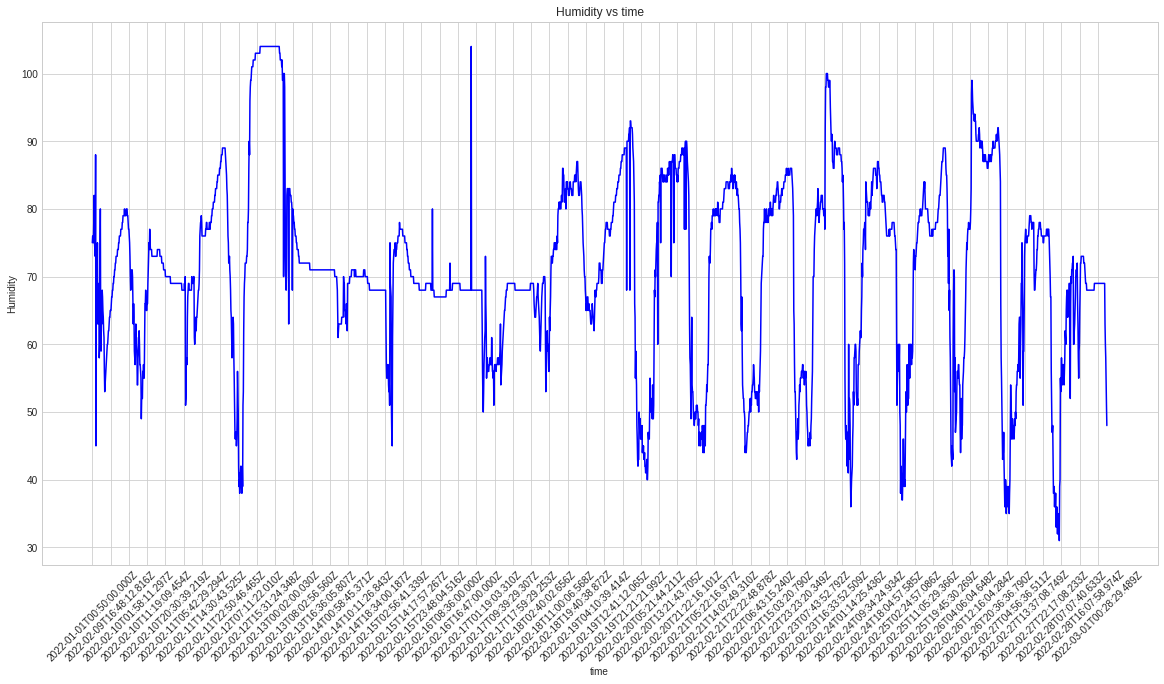

In [ ]:
plot_data(o,'time','Humidity','blue')

In [ ]:
def convert_date(x):
  date=x.date()
  return date

In [ ]:
o_=o[['time','Humidity']]
# o_['time']=o_['time'].apply(lambda x: convert_date(x))
o_=o_.set_index('time')

o_.head()

,Humidity
time,
2022-01-01 00:50:00+00:00,75
2022-01-01 01:10:00+00:00,76
2022-01-01 01:29:00+00:00,76
2022-01-01 01:49:00+00:00,75
2022-01-01 02:39:00+00:00,78


In [ ]:
#perform STL decompose
stl = STL(o_,period=10)
result = stl.fit()

In [ ]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

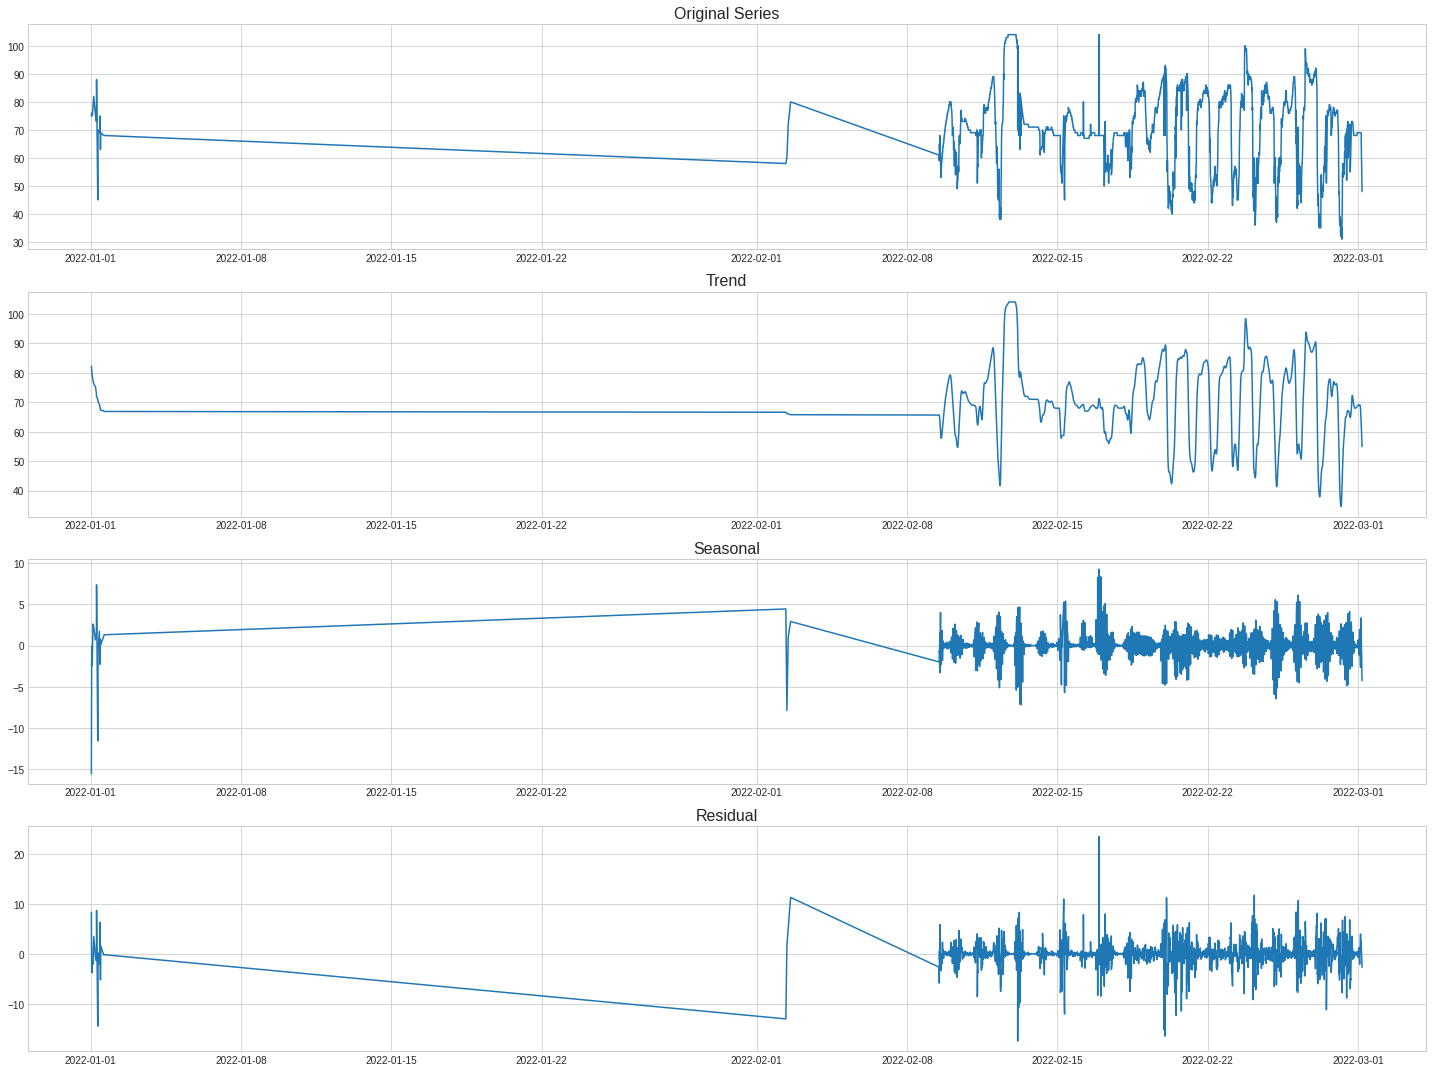

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(4,1,1)
plt.plot(o_)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

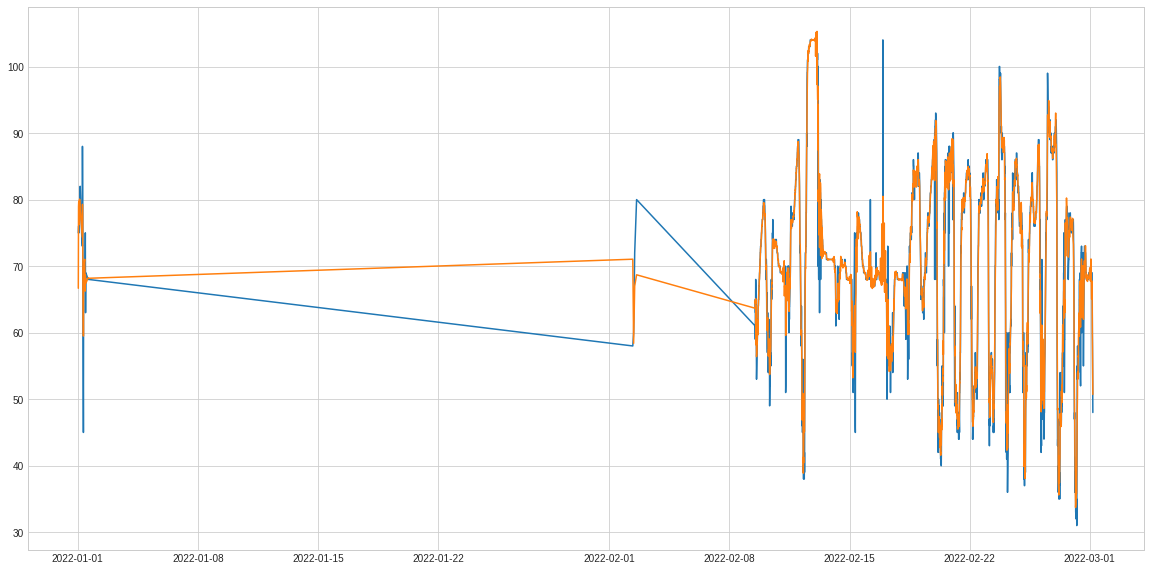

In [ ]:
estimated = trend + seasonal
plt.figure(figsize=(20,10))
plt.plot(o_)
plt.plot(estimated)

In [ ]:
#Anomaly Detection
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 1.5*resid_dev
upper = resid_mu + 1.5*resid_dev

(738156.0, 738215.0)

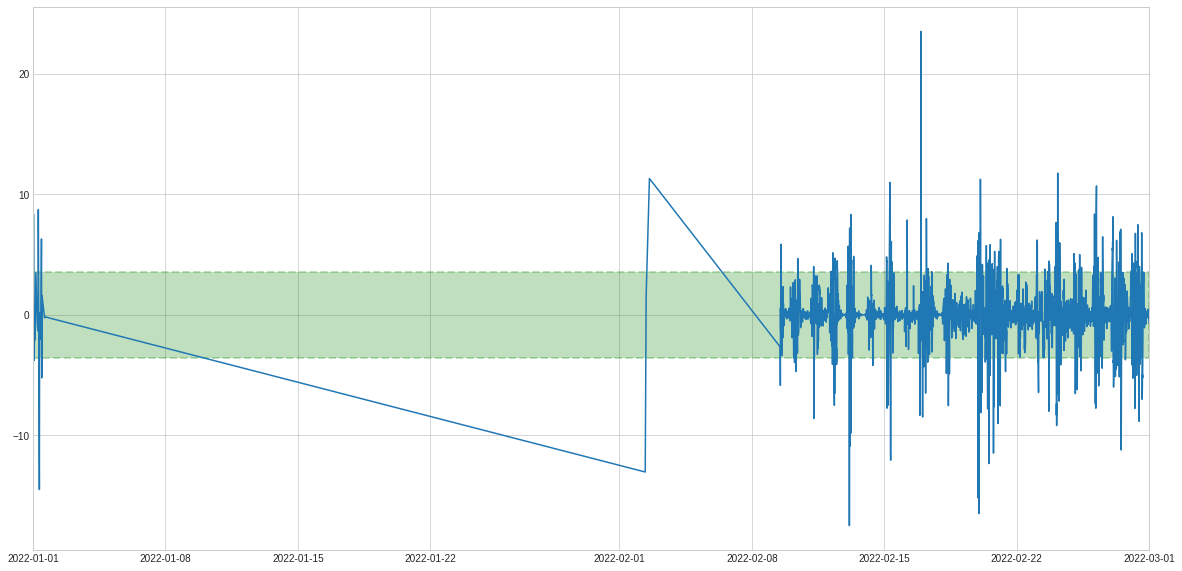

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(resid)

plt.fill_between([datetime(2022,1,1), datetime(2022,3,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2022,1,1), datetime(2022,3,1))

In [ ]:
anomalies = o_[(resid < lower) | (resid > upper)]

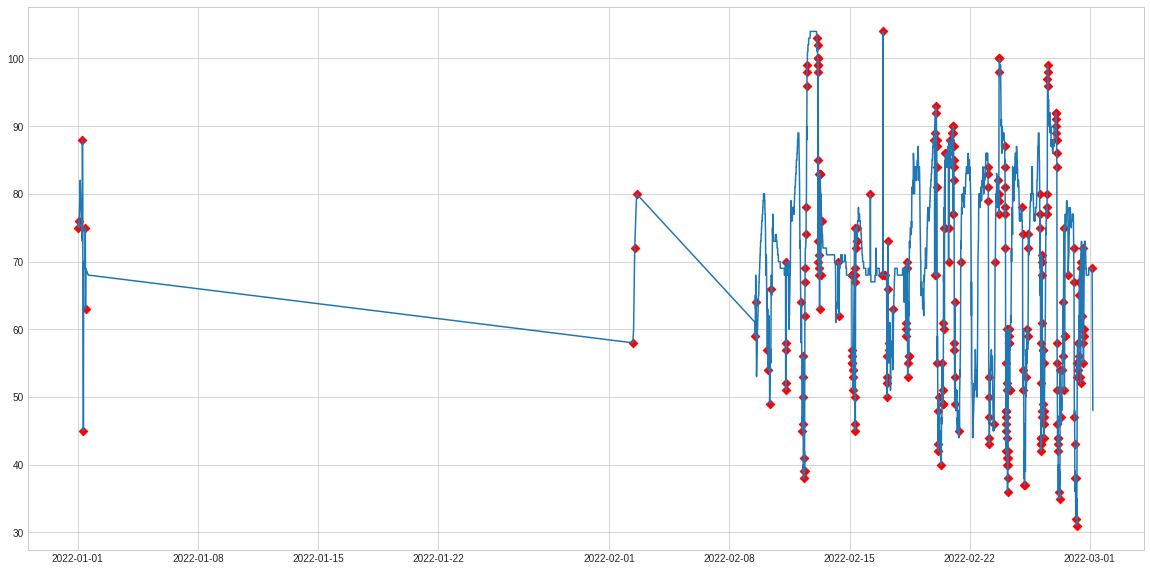

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(o_)
plt.scatter(anomalies.index, anomalies['Humidity'], color='r', marker='D')

In [ ]:
anomalies

,Humidity
time,
2022-01-01 00:50:00+00:00,75
2022-01-01 01:29:00+00:00,76
2022-01-01 06:39:00+00:00,88
2022-01-01 07:59:00+00:00,45
2022-01-01 10:39:00+00:00,75
...,...
2022-02-28 15:07:47.987000+00:00,58
2022-02-28 15:17:48.192000+00:00,55
2022-02-28 15:37:58.889000+00:00,59


###AD

In [ ]:
#Threshold anomaly detection: to find outliers
threshold_ad = ThresholdAD(low=o['Humidity'].median()*0.8, high=o['Humidity'].median()*1.2)
anomalies = threshold_ad.detect(s)

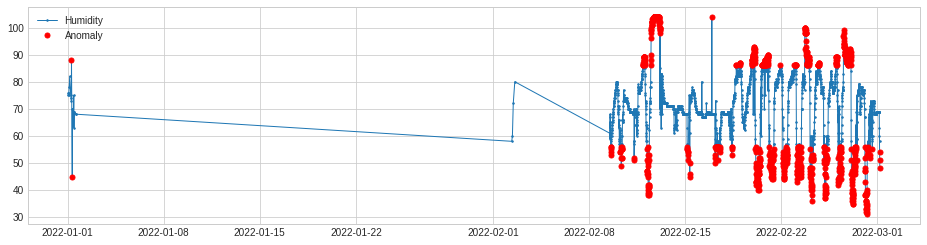

In [ ]:
chart = plot(s,anomaly=anomalies,ts_linewidth=1,ts_markersize=3,anomaly_markersize=5,anomaly_color='red',anomaly_tag='marker')

In [ ]:
#Quartile anomaly detection: to find outliers
quantile_ad = QuantileAD(low=0.01, high=0.99)
anomalies = quantile_ad.fit_detect(s)

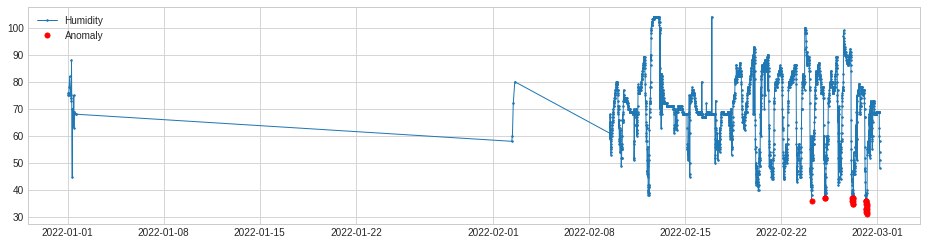

In [ ]:
chart = plot(s,anomaly=anomalies,ts_linewidth=1,ts_markersize=3,anomaly_markersize=5,anomaly_color='red',anomaly_tag='marker')

In [ ]:
#Inter-quartile anomaly detection: to find outliers
iqr_ad = InterQuartileRangeAD(c=1.5)
anomalies = iqr_ad.fit_detect(s)

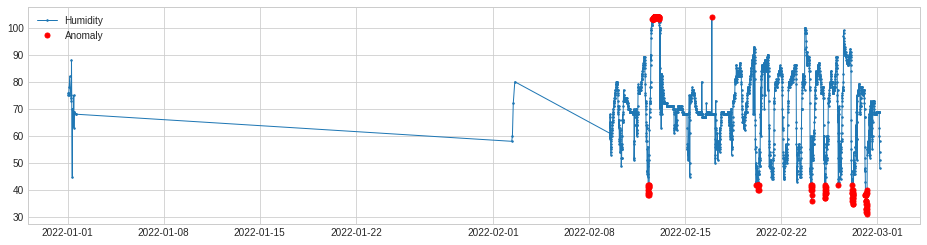

In [ ]:
chart = plot(s,anomaly=anomalies,ts_linewidth=1,ts_markersize=3,anomaly_markersize=5,anomaly_color='red',anomaly_tag='marker')

In [ ]:
#Persist anomaly detection: to find spikes
persist_ad = PersistAD(c=3, side='both')
persist_ad.window = 30
anomalies = persist_ad.fit_detect(s)

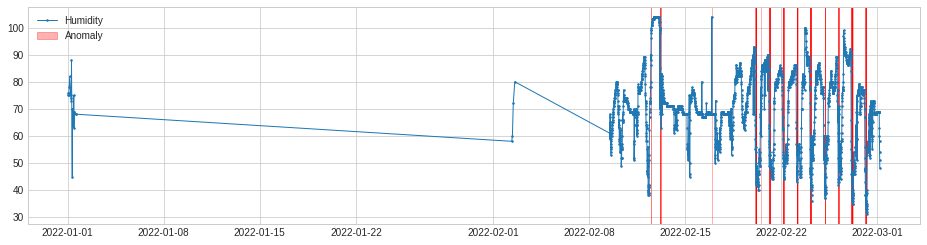

In [ ]:
chart = plot(s,anomaly=anomalies,ts_linewidth=1,ts_markersize=3,anomaly_markersize=5,anomaly_color='red')

In [ ]:
#Level shift anomaly detection
level_shift_ad = LevelShiftAD(c=2.0, side='both',window=5)
anomalies = level_shift_ad.fit_detect(s)

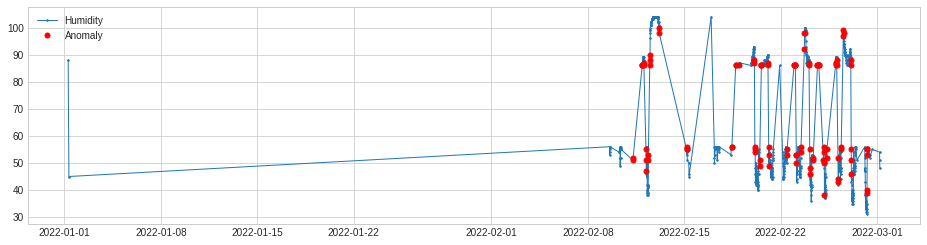

In [ ]:
chart = plot(s,anomaly=anomalies,ts_linewidth=1,ts_markersize=3,anomaly_markersize=5,anomaly_color='red',anomaly_tag='marker')

In [ ]:
anomalies.value_counts()

False    704
True      97
Name: Humidity, dtype: int64

In [ ]:
persist_ad = PersistAD(c=2, side='both')
anomalies = persist_ad.fit_detect(s)

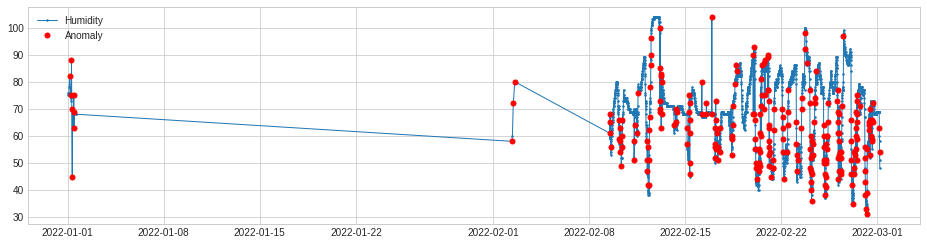

In [ ]:
chart = plot(s,anomaly=anomalies,ts_linewidth=1,ts_markersize=3,anomaly_markersize=5,anomaly_color='red',anomaly_tag='marker')

In [ ]:
results = anomalies.to_frame()

In [ ]:
results['Humidity']=results['Humidity'].astype(str)

In [ ]:
results[results['Humidity']=='True']

,Humidity
time,
2022-02-11 06:37:36.339000+00:00,True
2022-02-11 06:48:36.295000+00:00,True
2022-02-11 22:30:46.371000+00:00,True
2022-02-11 22:40:46.466000+00:00,True
2022-02-11 22:50:46.465000+00:00,True
...,...
2022-02-28 06:07:40.761000+00:00,True
2022-02-28 06:17:40.722000+00:00,True
2022-02-28 06:37:51.191000+00:00,True


In [ ]:
results.reset_index(inplace=True)

In [ ]:
results.columns

Index(['time', 'Humidity'], dtype='object')

In [ ]:
new_o=o
new_o.head()

,time,Battery,Humidity,Internal Temperature,Soil Temperature,Temperature,Signal Strength
0,2022-01-01 00:50:00+00:00,287,75,53,19.0,27,NaN
1,2022-01-01 01:10:00+00:00,287,76,53,19.0,27,NaN
2,2022-01-01 01:29:00+00:00,287,76,53,19.0,27,NaN
3,2022-01-01 01:49:00+00:00,287,75,53,19.0,27,NaN
4,2022-01-01 02:39:00+00:00,287,78,52,19.0,27,NaN


In [ ]:
def check_time(df_,x):
  if(x['time'].isin(df_['time']).any()):
    return x['Humidity']

In [ ]:
new_o.loc[new_o['time'].isin(results['time']).any(),'anomaly']=check_time(new_o,results)

In [ ]:
# results = pd.merge(o, results, left_index=True, right_index=True)
# results = results.rename(columns={'Humidity_x':'Humidity','Humidity_y':'anomaly'})

###Mtd0

In [ ]:
ndf['Humidity'].value_counts()

104.0    54
86.0     53
89.0     49
87.0     45
88.0     44
56.0     40
55.0     36
46.0     32
53.0     30
54.0     29
90.0     28
52.0     28
51.0     28
47.0     28
50.0     26
48.0     24
49.0     22
45.0     17
103.0    15
42.0     14
44.0     14
91.0     14
39.0     12
43.0     12
38.0     11
102.0    11
40.0     10
92.0      9
98.0      9
100.0     8
99.0      8
41.0      8
93.0      7
36.0      6
101.0     5
37.0      5
35.0      4
94.0      3
33.0      3
96.0      2
95.0      2
32.0      2
97.0      1
34.0      1
31.0      1
Name: Humidity, dtype: int64

In [ ]:
new=ndf[['time','Humidity']].copy()

In [ ]:
new['next']=new['Humidity'].shift(-1)

In [ ]:
#define conditions
conditions = [new['next'] > new['Humidity'], 
              new['next'] < new['Humidity'],new['Humidity']==new['next']]

#define choices
choices = ['GREATER', 'LOWER','SAME']

In [ ]:
#create new column in DataFrame that displays results of comparisons
new['var'] = np.select(conditions, choices, default=None)

In [ ]:
new

,time,Humidity,next,var
0,2022-01-01T06:39:00.000Z,88.0,45.0,LOWER
1,2022-01-01T07:59:00.000Z,45.0,56.0,GREATER
2,2022-02-09T13:41:13.410Z,56.0,53.0,LOWER
3,2022-02-09T13:52:13.370Z,53.0,54.0,GREATER
4,2022-02-09T14:03:13.505Z,54.0,55.0,GREATER
...,...,...,...,...
805,2022-02-28T11:17:43.707Z,52.0,55.0,GREATER
806,2022-02-28T15:17:48.192Z,55.0,54.0,LOWER
807,2022-03-01T04:08:32.126Z,54.0,51.0,LOWER
808,2022-03-01T04:18:32.224Z,51.0,48.0,LOWER


In [ ]:
new[new['var']=='SAME']

,time,Humidity,next,var
7,2022-02-10T06:11:10.579Z,54.0,54.0,SAME
12,2022-02-10T08:33:55.395Z,52.0,52.0,SAME
13,2022-02-10T08:45:09.993Z,52.0,52.0,SAME
16,2022-02-10T09:18:09.807Z,55.0,55.0,SAME
17,2022-02-10T09:40:09.762Z,55.0,55.0,SAME
...,...,...,...,...
767,2022-02-27T09:57:08.981Z,56.0,56.0,SAME
773,2022-02-28T02:37:07.991Z,47.0,47.0,SAME
777,2022-02-28T03:17:40.782Z,38.0,38.0,SAME
784,2022-02-28T04:27:40.796Z,33.0,33.0,SAME


##Variation Analysis

In [ ]:
fault_names={'Battery':'BFaults','Internal Temperature':'ITFaults','Light Intensity':'LIA1Faults','Humidity':'HFaults','Irometer':'IROFaults','Temperature':'TFaults','Soil Temperature':'STFaults','Signal Strength':'SSFaults'}
variation_names={'Battery':'BVAR','Internal Temperature':'ITVAR','Light Intensity':'LIA1VAR','Humidity':'HVAR','Irometer':'IROVAR','Temperature':'TVAR','Soil Temperature':'STVAR','Signal Strength':'SSVAR'}

In [ ]:
def return_num_rows(low,high,tot_var_files,sensor,fault_names,variation_names):
  indx=[]
  for i in range(low,high):
    df_=pd.read_csv(tot_var_files[i])
    if('{}'.format(fault_names[sensor]) in df_.columns):
      if ('{}'.format(variation_names[sensor]) in df_['{}'.format(fault_names[sensor])].values):
        indx.append(df_[df_['{}'.format(fault_names[sensor])]=='{}'.format(variation_names[sensor])].shape[0])
      else:
        pass
    else:
      pass
  if(len(indx)>0):
    bg=max(indx)
  else:
    bg=0
  return bg

def check_wrong_data_points(x,df_,vals,sensor):
  if((x<vals[0])|(x>vals[1])):
    return None
  else:
    return x

def add_data(indx,low,high,tot_var_files,sensor,fault_names,variation_names):
  cols={'Battery':{'min':260,'max':314},'Internal Temperature':{'min':-55,'max':125},'Light Intensity':{'min':0,'max':65535},'Humidity':{'min':0,'max':110},'Irometer':{'min':0,'max':200},'Temperature':{'min':-40,'max':125},'Soil Temperature':{'min':-55,'max':125},'Signal Strength':{'min':2,'max':30}}
  col_names={'Battery':'B','Internal Temperature':'IT','Light Intensity':'LIA1','Humidity':'H','Irometer':'IRO','Temperature':'T','Soil Temperature':'ST','Signal Strength':'SS'}
  hdf=pd.DataFrame(index=np.arange(indx))
  for i in range(low,high):
    df_=pd.read_csv(tot_var_files[i],low_memory=False)
    if('{}'.format(fault_names[sensor]) in df_.columns):
      if ('{}'.format(variation_names[sensor]) in df_['{}'.format(fault_names[sensor])].values):
        hdf['{}'.format(i)]=df_[df_['{}'.format(fault_names[sensor])]=='{}'.format(variation_names[sensor])][sensor]
        hdf['{}min'.format(i)]=df_[df_['{}'.format(fault_names[sensor])]=='{}'.format(variation_names[sensor])]['{}min'.format(col_names[sensor])]
        hdf['{}max'.format(i)]=df_[df_['{}'.format(fault_names[sensor])]=='{}'.format(variation_names[sensor])]['{}max'.format(col_names[sensor])]
      else:
        pass
    else:
      pass

  #dropping wrong data points
  for i in hdf.columns:
    vals=[]
    for col in cols:
      if(col==sensor):
        for sen,val in cols[col].items():
          vals.append(val)
      else:
        pass
    # print(sensor,vals)
    hdf[i]=hdf[i].apply(lambda x: check_wrong_data_points(x,hdf,vals,sensor))
    hdf = hdf.dropna(how='all',axis=0) 
  return hdf

def plot_all(hdf,col_list,sensor):
    hdf.reset_index(inplace=True)
    matplotlib.rcParams['figure.figsize'] = (20,10)
    for c in hdf.columns:
      if c in col_list:
        
        plt.plot(hdf["index"], hdf['{}min'.format(c)],color='red')
        plt.plot(hdf["index"], hdf['{}max'.format(c)],color='green') 
        
        # plt.plot(hdf['index'],hdf[c],label=sensor+str(c))
    plt.legend()
    plt.xlabel('index')
    plt.ylabel(sensor)
    plt.title(sensor + " vs " +'index')


    plt.xticks(np.arange(0, len(hdf["index"]) + 1, 50))
    # rotate the labels
    plt.xticks(rotation = 45) 

In [ ]:
indx=return_num_rows(0,15,tot_var_files,'Humidity',fault_names,variation_names)
print(indx)
df_=add_data(indx,0,15,tot_var_files,'Humidity',fault_names,variation_names)

3431


In [ ]:
df_.head(3)

,0,0min,0max,1,1min,1max,2,2min,2max,3,...,11max,12,12min,12max,13,13min,13max,14,14min,14max
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_.shape

(1596, 45)

In [ ]:
num_list=[]
for i in range(15):
  num_list.append(str(i))
# print(num_list)

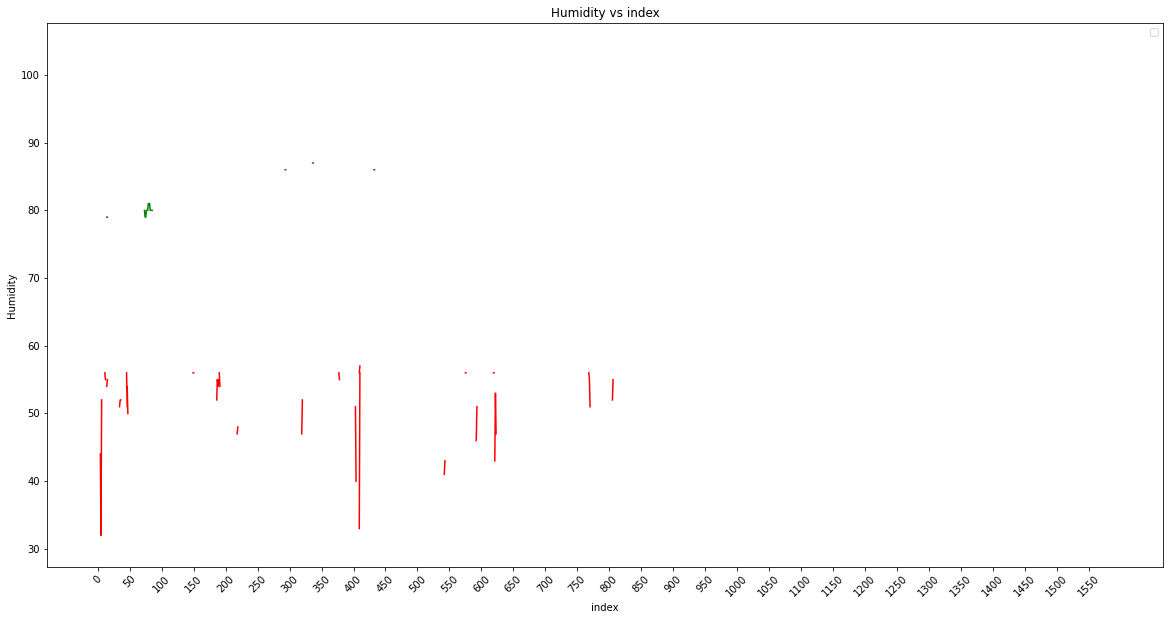

In [ ]:
plot_all(df_,num_list,'Humidity')

In [ ]:
indx=return_num_rows(0,35,tot_var_files,'Temperature',fault_names,variation_names)
print(indx)

7941


In [ ]:
df_=add_data(indx,0,35,tot_var_files,'Temperature',fault_names,variation_names)

In [ ]:
df_.shape

(7936, 34)

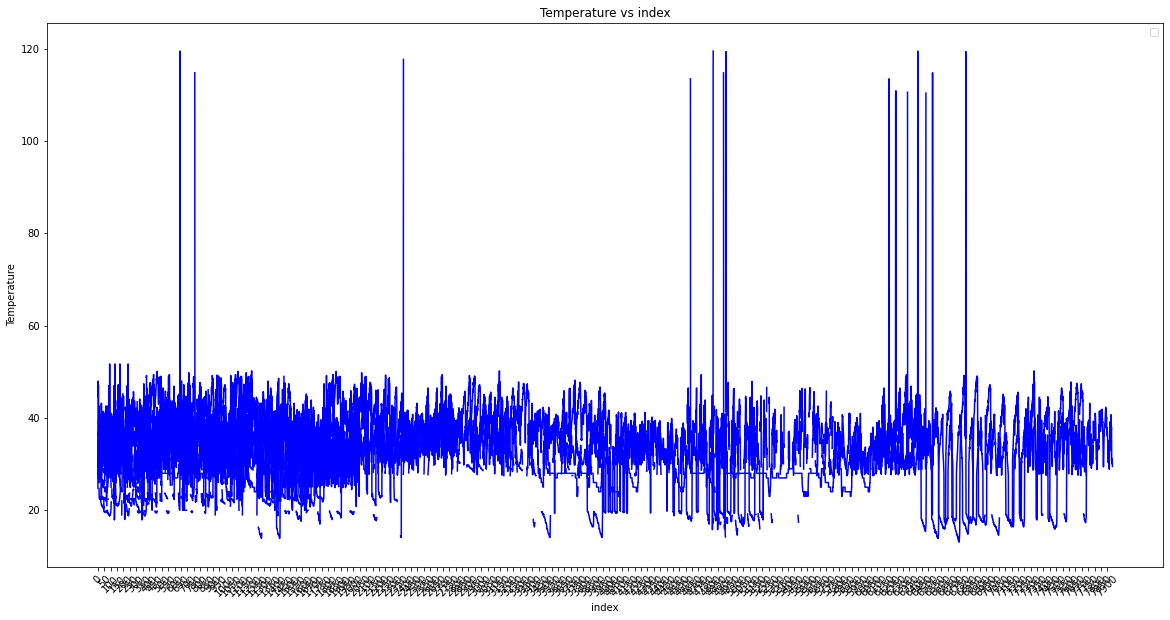

In [ ]:
plot_all(df_,num_list,'Temperature')

In [ ]:
indx=return_num_rows(0,35,tot_var_files,'Battery',fault_names,variation_names)
print(indx)

163


In [ ]:
df_=add_data(indx,0,35,tot_var_files,'Battery',fault_names,variation_names)

In [ ]:
df_.shape

(0, 14)

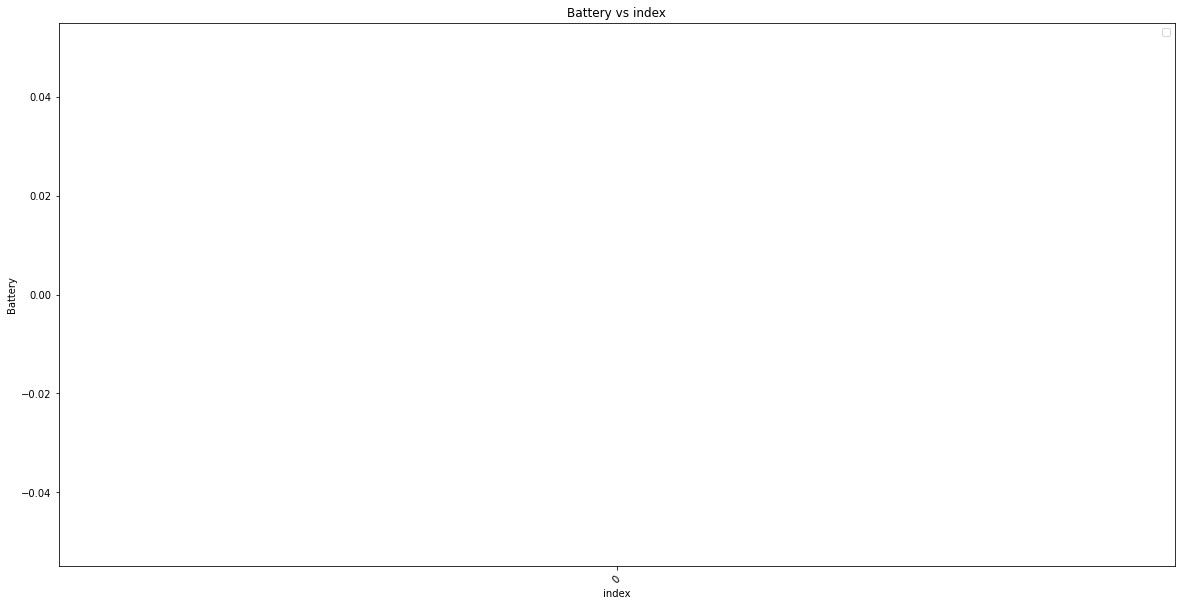

In [ ]:
plot_all(df_,num_list,'Battery')

In [ ]:
indx=return_num_rows(0,35,tot_var_files,'Internal Temperature',fault_names,variation_names)
print(indx)

3031


In [ ]:
df_=add_data(indx,0,35,tot_var_files,'Internal Temperature',fault_names,variation_names)

In [ ]:
df_.shape

(3001, 27)

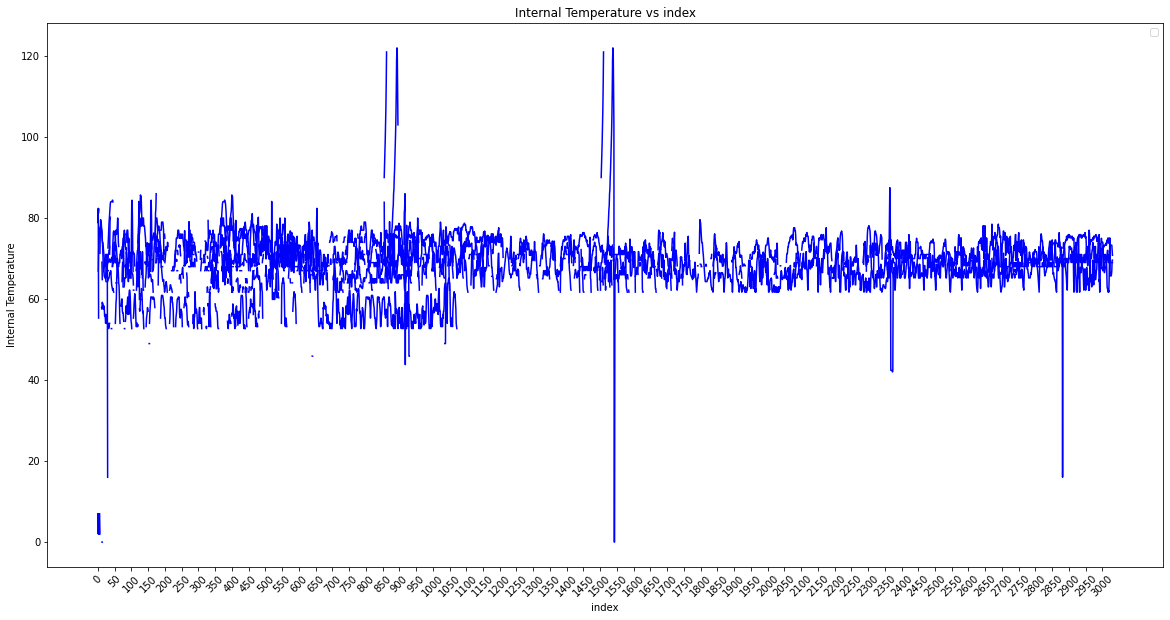

In [ ]:
plot_all(df_,num_list,'Internal Temperature')

In [ ]:
indx=return_num_rows(0,35,tot_var_files,'Light Intensity',fault_names,variation_names)
print(indx)

0


In [ ]:
indx=return_num_rows(0,35,tot_var_files,'Irometer',fault_names,variation_names)
print(indx)

0


In [ ]:
indx=return_num_rows(0,35,tot_var_files,'Soil Temperature',fault_names,variation_names)
print(indx)

789


In [ ]:
df_=add_data(indx,0,35,tot_var_files,'Soil Temperature',fault_names,variation_names)

In [ ]:
df_.shape

(471, 16)

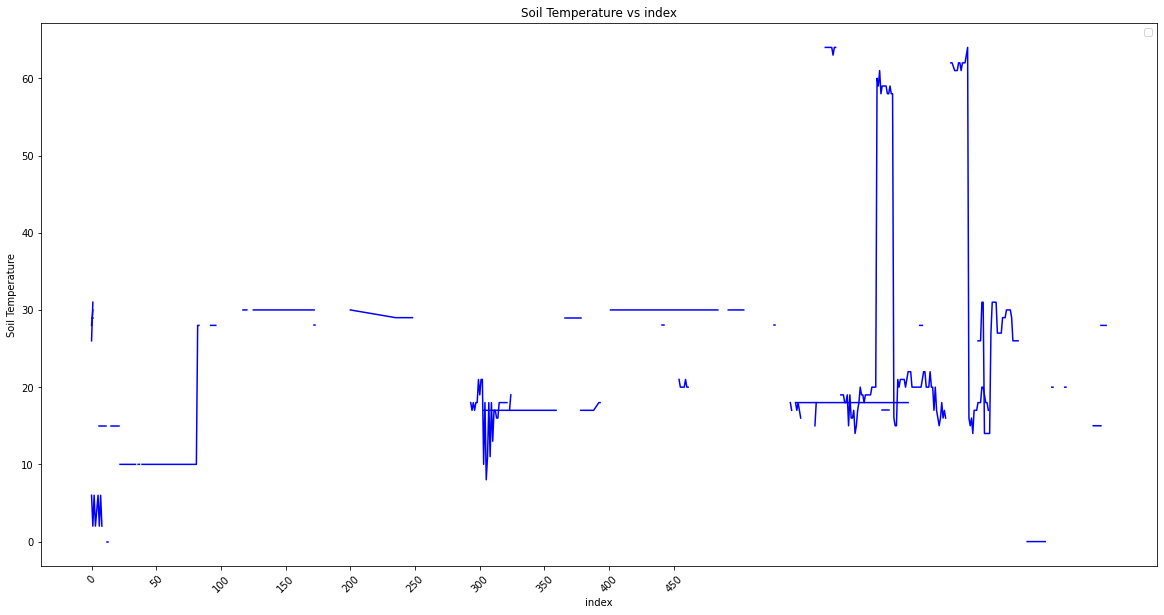

In [ ]:
plot_all(df_,num_list,'Soil Temperature')

In [ ]:
indx=return_num_rows(0,35,tot_var_files,'Signal Strength',fault_names,variation_names)
print(indx)

3903


In [ ]:
df_=add_data(indx,0,35,tot_var_files,'Signal Strength',fault_names,variation_names)

In [ ]:
df_.shape

(3702, 33)

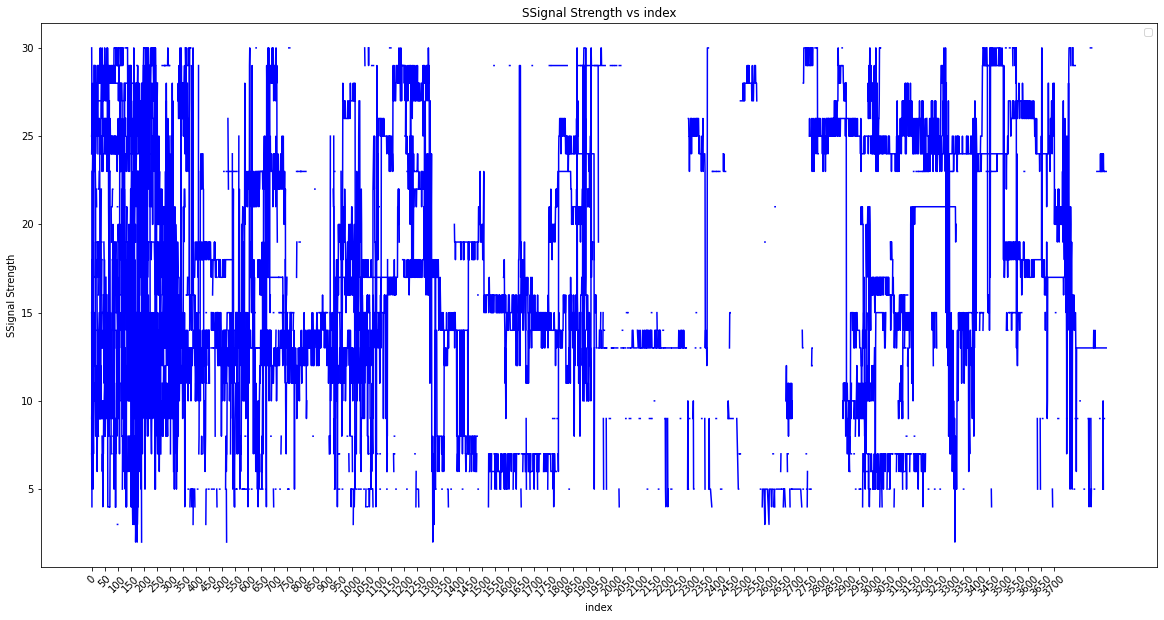

In [ ]:
plot_all(df_,num_list,'SSignal Strength')